# Exploratory Data Analysis (EDA):

## What is Exploratory Data Analysis (EDA)?



Exploratory Data Analysis (EDA) is the process of examining, summarizing, and visualizing data to uncover patterns, trends, anomalies, relationships, or errors before applying any modeling or statistical techniques.

## Key Objectives of EDA:

- Understand the structure of your data
- Detect outliers or anomalies
- Identify missing or incorrect values
- Uncover relationships between variables
- Generate hypotheses for further testing or modeling

## Why Do We Need EDA?

| Purpose                   | Explanation                                                                 |
| ------------------------- | --------------------------------------------------------------------------- |
| 🧭 Understand the Dataset | Know what each feature/column means, its data type, and distribution.       |
| 🧼 Data Cleaning          | Identify missing values, duplicates, and inconsistencies.                   |
| 📈 Feature Exploration    | Find which variables are most important or correlated.                      |
| 🧪 Prepare for Modeling   | Ensure the data is clean and ready for machine learning/statistical models. |
| 🔍 Discover Insights      | Spot trends and patterns that could inform business or research decisions.  |


## Typical EDA Techniques:

| Method                | Tool / Plot Type                    |
| --------------------- | ----------------------------------- |
| Summary Stats         | `df.describe()`, `df.info()`        |
| Missing Value Check   | Heatmaps, `df.isnull()`             |
| Distribution Analysis | Histograms, KDE plots               |
| Relationship Analysis | Scatter plots, correlation heatmaps |
| Categorical Analysis  | Bar plots, count plots              |
| Time-based Analysis   | Line charts, time series plots      |


# Step-by-Step EDA Goals:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("customers_data.csv")
df.head()

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
1,2,1Ef7b82A4CAAD10,Preston,Lozano,Vega-Gentry,East Jimmychester,Djibouti,5153435776,686-620-1820x944,vmata@colon.com,2021-04-23,http://www.hobbs.com/
2,3,6F94879bDAfE5a6,Roy,Berry,Murillo-Perry,Isabelborough,Antigua and Barbuda,+1-539-402-0259,(496)978-3969x58947,beckycarr@hogan.com,2020-03-25,http://www.lawrence.com/
3,4,5Cef8BFA16c5e3c,Linda,Olsen,"Dominguez, Mcmillan and Donovan",Bensonview,Dominican Republic,001-808-617-6467x12895,+1-813-324-8756,stanleyblackwell@benson.org,2020-06-02,http://www.good-lyons.com/
4,5,053d585Ab6b3159,Joanna,Bender,"Martin, Lang and Andrade",West Priscilla,Slovakia (Slovak Republic),001-234-203-0635x76146,001-199-446-3860x3486,colinalvarado@miles.net,2021-04-17,https://goodwin-ingram.com/


In [5]:
# Understand the Dataset
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Index              100 non-null    int64 
 1   Customer Id        100 non-null    object
 2   First Name         100 non-null    object
 3   Last Name          100 non-null    object
 4   Company            100 non-null    object
 5   City               100 non-null    object
 6   Country            100 non-null    object
 7   Phone 1            100 non-null    object
 8   Phone 2            100 non-null    object
 9   Email              100 non-null    object
 10  Subscription Date  100 non-null    object
 11  Website            100 non-null    object
dtypes: int64(1), object(11)
memory usage: 9.5+ KB


,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
count,100.000000,100,100,100,100,100,100,100,100,100,100,100
unique,NaN,100,93,97,99,100,85,100,100,100,96,100
top,NaN,DD37Cf93aecA6Dc,Sheryl,Foley,Simon LLC,East Leonard,Solomon Islands,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2021-04-23,http://www.stephenson.com/
freq,NaN,1,2,2,2,1,4,1,1,1,2,1
mean,50.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,29.011492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,25.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,50.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,75.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Find Missing or Incorrect Data

In [6]:
df.isnull().sum()


Index                0
Customer Id          0
First Name           0
Last Name            0
Company              0
City                 0
Country              0
Phone 1              0
Phone 2              0
Email                0
Subscription Date    0
Website              0
dtype: int64

<Axes: >

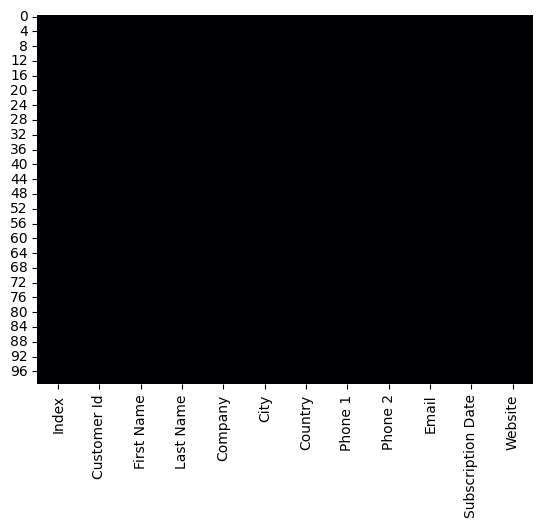

In [7]:
# Use a heatmap to visualize:
sns.heatmap(df.isnull(), cbar=False, cmap='magma')

# Customer Growth Over Time

- Problem: When are people subscribing the most?
  
- Solution:
Convert the subscription date to a monthly format and plot:

<Axes: xlabel='Month', ylabel='Subscriptions'>

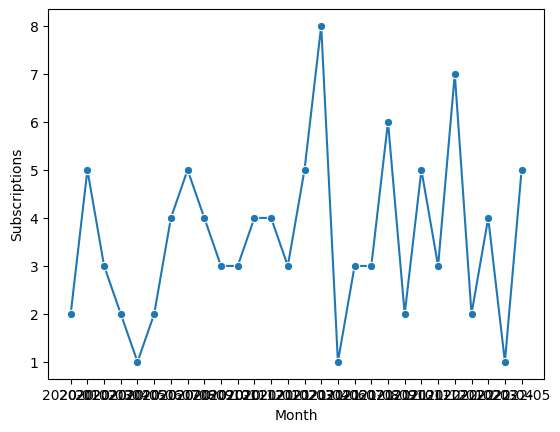

In [8]:
df['Subscription Date'] = pd.to_datetime(df['Subscription Date'])
df['Month'] = df['Subscription Date'].dt.to_period('M').astype(str)

monthly = df.groupby('Month').size().reset_index(name='Subscriptions')
sns.lineplot(data=monthly, x='Month', y='Subscriptions', marker='o')


# Geographical Distribution

## Problem: Which countries or cities have the most customers?


<Axes: xlabel='Country'>

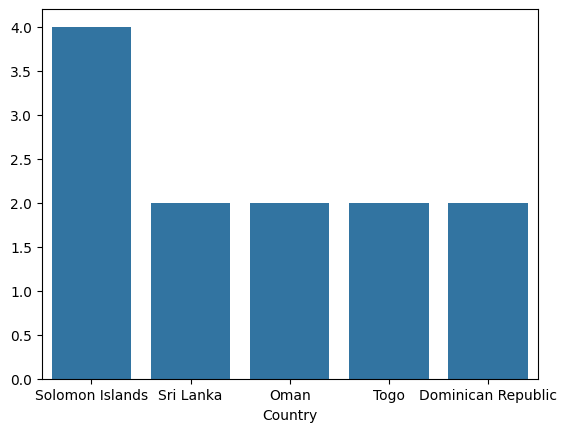

In [9]:
top_countries = df['Country'].value_counts().nlargest(5)
sns.barplot(x=top_countries.index, y=top_countries.values)


# Detect Duplicates or Invalid Data

## Problem: Are there duplicate records or invalid emails?


In [10]:
df.duplicated().sum()
df[~df['Email'].str.contains('@')]


,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website,Month


# Discover Relationships

## Problem: Does one company dominate the customer base?


<Axes: ylabel='Company'>

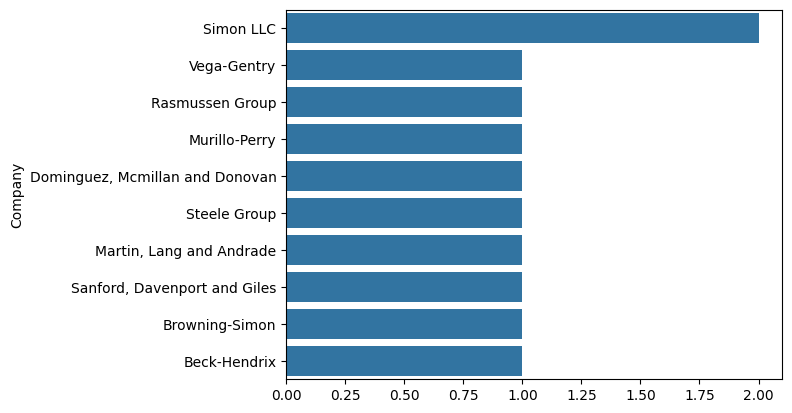

In [11]:
top_companies = df['Company'].value_counts().head(10)
sns.barplot(x=top_companies.values, y=top_companies.index)
